## Video Game Data Wrangling

In this notebook, we will be loading and cleanign data for the Capstone 2 Project: Video Game Popularity. The purpose of this project is to predict the popularity of a video game based on it's features such as camera angle, character customization, genre, and more. We will use different methods of determining game popularity: Critic Score and User Score.

We will be analyzing 4 data sets through this project, most of which is from Steam, we will be working to merge the relvant data together, in future notebooks.

Importing packages

In [1]:
#Data Wrangling, currently working on making this a git repository, before starting
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

import requests
import numpy as np

# I. Working with Steam data: Hours played and number purchases

In [2]:
#steam data, has hours played, note 1 = purchase
steam_data_hours_raw = pd.read_csv("C:/Users/book_/OneDrive/Documents/GitHub/Capstone2-Video-Game-Popularity/csv_files/steam-200k.csv", names = ['UserID', 'Game', 'Purchase/Play', 'Hours', '0'])
steam_data_hours_raw.head()

,UserID,Game,Purchase/Play,Hours,0
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,purchase,1.0,0


In [3]:
#Dropping Last column: just 0's
steam_data_hours_raw.drop('0', axis=1, inplace = True)
steam_data_hours_raw.head()

,UserID,Game,Purchase/Play,Hours
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0
1,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,purchase,1.0
3,151603712,Fallout 4,play,87.0
4,151603712,Spore,purchase,1.0


In [4]:
#looked at .describe(), however note all "purchase" actions are marked as 1 in the "hours" so this is causing a skew in our data, so we need to filter
steam_data_play = steam_data_hours_raw[steam_data_hours_raw['Purchase/Play']=='play']
print(steam_data_play['Hours'].describe())
print(steam_data_play['Hours'].isna().sum())

count    70489.000000
mean        48.878063
std        229.335236
min          0.100000
25%          1.000000
50%          4.500000
75%         19.100000
max      11754.000000
Name: Hours, dtype: float64
0


<AxesSubplot:>

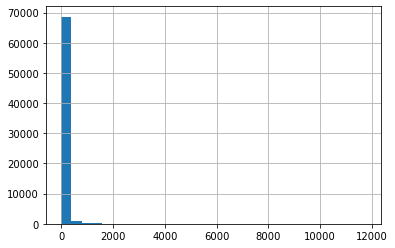

In [5]:
#No null values in games with the "play function"
steam_data_play['Hours'].hist(bins=30)
# Note there appears to be a strong outlier in the data to look into more in exploritory data. 
# Also note 25% of the data is less than 1 hour of play time


In [6]:
steam_data_play.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70489 entries, 1 to 199999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UserID         70489 non-null  int64  
 1   Game           70489 non-null  object 
 2   Purchase/Play  70489 non-null  object 
 3   Hours          70489 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.7+ MB


In [7]:
steam_data_play.to_csv("C:/Users/book_/OneDrive/Documents/GitHub/Capstone2-Video-Game-Popularity/csv_files/steam_data_play_clean.csv")

In [8]:
#Could use this to calculate number of sales of games in steam data.
steam_data_purchase = steam_data_hours_raw[steam_data_hours_raw['Purchase/Play']=='purchase']
steam_data_purchase.to_csv("C:/Users/book_/OneDrive/Documents/GitHub/Capstone2-Video-Game-Popularity/csv_files/steam_data_purchase_clean.csv")

This data may be useful in determining if a game was popular or not, by either the hours played or by calculating the numbeer of purchases per game. This may be of more use than the next data sets because it is specifically for Steam Data.

# II. Video Game Data 2016: Sales, Critic Score, User Score

In [9]:
#video game sales through 2016 with critic and user scores
vg_sales_2016_w_scores = pd.read_csv("C:/Users/book_/OneDrive/Documents/GitHub/Capstone2-Video-Game-Popularity/csv_files/Video_Games_Sales_as_at_22_Dec_2016.csv")

In [10]:
print(vg_sales_2016_w_scores.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB
None


In [11]:
vg_sales_2016_w_scores.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# has column names in correct places
vg_sales_2016_w_scores.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,7.125046,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,1.500006,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


In [13]:
vg_sales_2016_w_scores.isna().sum()
#Hypothesis: there is a corrolation between year of release and missing critic/user scores

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

array([[<AxesSubplot:title={'center':'Year_of_Release'}>,
        <AxesSubplot:title={'center':'Critic_Score'}>],
       [<AxesSubplot:title={'center':'User_Score'}>, <AxesSubplot:>]],
      dtype=object)

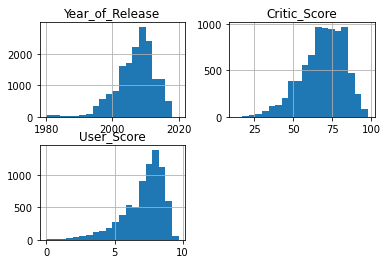

In [14]:
vg_sales_2016_w_scores.hist(column=['Year_of_Release','Genre','Critic_Score','User_Score','Rating'], bins=20)

<AxesSubplot:xlabel='Genre', ylabel='Critic_Score'>

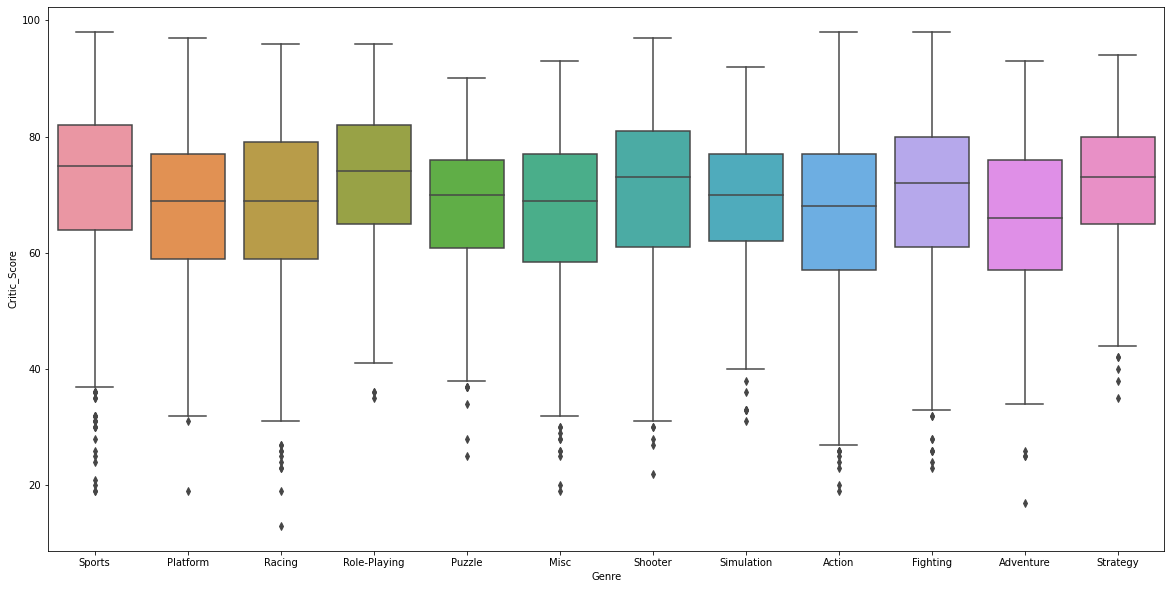

In [15]:
plt.figure(figsize=(20,10))
sns.boxplot(x="Genre", y="Critic_Score", data=vg_sales_2016_w_scores)

<AxesSubplot:xlabel='Genre', ylabel='User_Score'>

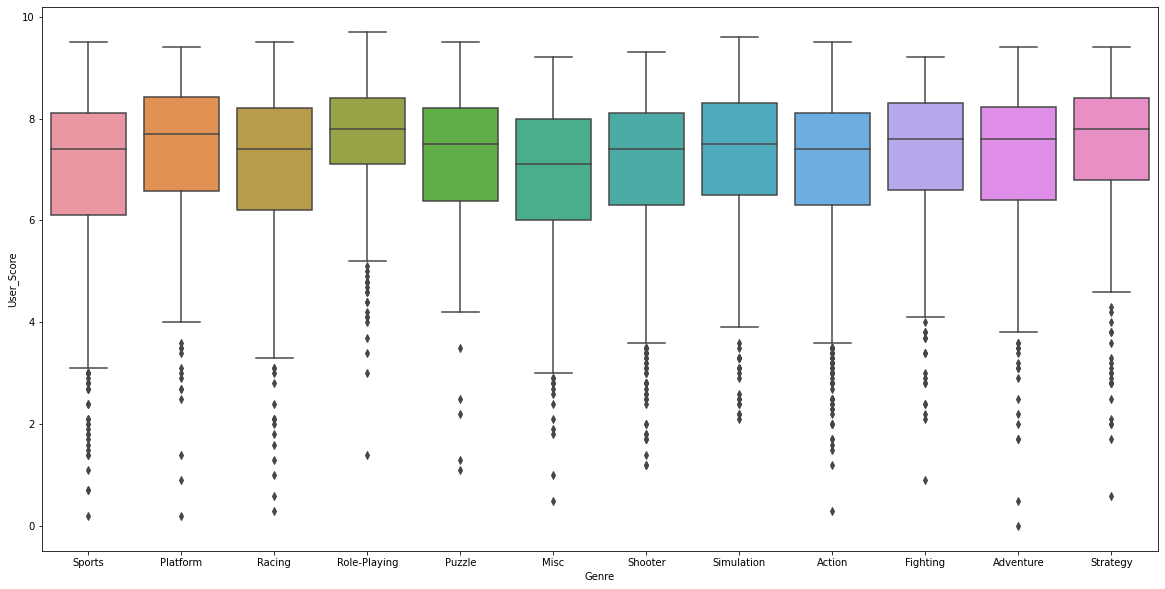

In [16]:
plt.figure(figsize=(20,10))
sns.boxplot(x="Genre", y="User_Score", data=vg_sales_2016_w_scores)

No changess were made to this data set. There is a significant amount of missing data. I would be interested if there is a corrilation between the missing data and the year. This data set is nice because of it's multiple ways of determining popularity, and we can determine if Genre, Publisher, and/or Developer corrolates with the game's popularity.

# III. Video game sales 2019: has critic and user scores. 

Look into combining with 2016 data

In [17]:
vg_2019_w_scores = pd.read_csv("C:/Users/book_/OneDrive/Documents/GitHub/Capstone2-Video-Game-Popularity/csv_files/vgsales-12-4-2019.csv")
vg_2019_w_scores.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg


In [18]:
vg_2019_w_scores.describe()

,Rank,VGChartz_Score,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,status,Vgchartzscore
count,55792.000000,0.0,6536.000000,335.000000,1827.000000,19415.000000,12964.000000,13189.000000,7043.000000,15522.000000,54813.000000,55792.0,799.000000
mean,27896.500000,NaN,7.213709,8.253433,1.887258,0.365503,0.275541,0.155263,0.110402,0.044719,2005.659095,1.0,7.425907
std,16105.907446,NaN,1.454079,1.401489,4.195693,0.833022,0.512809,0.399257,0.184673,0.129554,8.355585,0.0,1.384226
min,1.000000,NaN,1.000000,2.000000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,1970.000000,1.0,2.600000
25%,13948.750000,NaN,6.400000,7.800000,0.200000,0.030000,0.050000,0.010000,0.020000,0.000000,2000.000000,1.0,6.800000
50%,27896.500000,NaN,7.500000,8.500000,0.590000,0.120000,0.120000,0.040000,0.050000,0.010000,2008.000000,1.0,7.800000
75%,41844.250000,NaN,8.300000,9.100000,1.800000,0.360000,0.290000,0.140000,0.120000,0.040000,2011.000000,1.0,8.500000
max,55792.000000,NaN,10.000000,10.000000,82.860000,20.320000,9.760000,9.850000,2.690000,3.120000,2020.000000,1.0,9.600000


In [19]:
#VGChartz_Score column is empty
vg_2019_w_scores.drop(columns = 'VGChartz_Score', inplace=True)
vg_2019_w_scores.shape

(55792, 22)

In the Preprocessing step we ran out of space in Git hub along with having trouble with the computers I have dealing with the data. So the next parts are to help speed up the running of the code and hopefully reduce file size.

In [20]:
vg_2019_w_scores.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg


In [21]:
vg_2019_w_scores['Developer'].value_counts(ascending=False).head(100)

Unknown                   4756
Konami                     911
Sega                       817
Capcom                     684
Namco                      425
                          ... 
Bethesda Softworks          66
Nintendo R&D1               66
Compile                     65
Backbone Entertainment      64
Climax Group                64
Name: Developer, Length: 100, dtype: int64

In [22]:
vg_2019_w_scores.drop(columns=['basename', 'url', 'status', 'img_url', 'Last_Update'], inplace=True)
vg_2019_w_scores['ESRB_Rating'].fillna(value='E', inplace=True)
vg_2019_w_scores['Developer'].fillna(value='Other', inplace=True)
vg_2019_w_scores.loc[vg_2019_w_scores['Genre'].isin((vg_2019_w_scores['Genre'].value_counts()[vg_2019_w_scores['Genre'].value_counts() <= 500]).index), 'Genre'] = 'Other'
vg_2019_w_scores.loc[vg_2019_w_scores['ESRB_Rating'].isin((vg_2019_w_scores['ESRB_Rating'].value_counts()[vg_2019_w_scores['ESRB_Rating'].value_counts() <= 500]).index), 'ESRB_Rating'] = 'Other'
vg_2019_w_scores.loc[vg_2019_w_scores['Platform'].isin((vg_2019_w_scores['Platform'].value_counts()[vg_2019_w_scores['Platform'].value_counts() <= 500]).index), 'Platform'] = 'Other'
vg_2019_w_scores.loc[vg_2019_w_scores['Publisher'].isin((vg_2019_w_scores['Publisher'].value_counts()[vg_2019_w_scores['Publisher'].value_counts() <= 80]).index), 'Publisher'] = 'Other'
vg_2019_w_scores.loc[vg_2019_w_scores['Developer'].isin((vg_2019_w_scores['Developer'].value_counts()[vg_2019_w_scores['Developer'].value_counts() <= 60]).index), 'Developer'] = 'Other'

In [23]:
vg_2019_w_scores.to_csv("C:/Users/book_/OneDrive/Documents/GitHub/Capstone2-Video-Game-Popularity/csv_files/vg_2019_w_scores_clean.csv")

This Data set has a built in ranking, I will want to do much of the same analysis on this set as with the previous. I dropped one of the columns because it was empty, we may be able to drop more, such as the status column being full of 1's.

# IV. Steam data 2019: Merged 

Look at categories and tags. Possibly calculate: Positive/Negative ratio, compare to average or median play time. Does price effect popularity?

In [24]:
steam_data_2019 = pd.read_csv("C:/Users/book_/OneDrive/Documents/GitHub/Capstone2-Video-Game-Popularity/csv_files/steam.csv", index_col='appid')
steam_data_2019.head()

,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
appid,,,,,,,,,,,,,,,,,
10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [25]:
steam_data_2019['platforms'].value_counts(ascending=False).head(100)

windows              18398
windows;mac;linux     4623
windows;mac           3439
windows;linux          610
mac                      3
mac;linux                1
linux                    1
Name: platforms, dtype: int64

In [26]:
steam_data_2019.loc[steam_data_2019['publisher'].isin((steam_data_2019['publisher'].value_counts()[steam_data_2019['publisher'].value_counts() <= 3]).index), 'publisher'] = 'Other'
steam_data_2019.loc[steam_data_2019['developer'].isin((steam_data_2019['developer'].value_counts()[steam_data_2019['developer'].value_counts() <= 10]).index), 'developer'] = 'Other'
steam_data_2019.drop(columns=['platforms', 'categories', 'genres', 'steamspy_tags', ], inplace=True)

In [27]:
steam_data_2019.to_csv('C:/Users/book_/OneDrive/Documents/GitHub/Capstone2-Video-Game-Popularity/csv_files/steam_data.csv')

The above were dropped becasue they are redundant information from the tags, other than platform. Platform was dropped because it wasn't as ueful as our other platform data

In [28]:
#This is the data I am most interested in, on Kaggle this came with the steam_data_2019 for joining purposes
steam_data_2019_tags = pd.read_csv("C:/Users/book_/OneDrive/Documents/GitHub/Capstone2-Video-Game-Popularity/csv_files/steamspy_tag_data.csv", index_col='appid')
steam_data_2019_tags.head()

,1980s,1990s,2.5d,2d,2d_fighter,360_video,3d,3d_platformer,3d_vision,4_player_local,...,warhammer_40k,web_publishing,werewolves,western,word_game,world_war_i,world_war_ii,wrestling,zombies,e_sports
appid,,,,,,,,,,,,,,,,,,,,,
10,144,564,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,550
20,0,71,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,122,0,0,0
40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50,0,77,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
steam_data_2019_tags.describe()

,1980s,1990s,2.5d,2d,2d_fighter,360_video,3d,3d_platformer,3d_vision,4_player_local,...,warhammer_40k,web_publishing,werewolves,western,word_game,world_war_i,world_war_ii,wrestling,zombies,e_sports
count,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,...,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000
mean,0.183826,0.167011,0.137689,3.646992,0.248053,0.005789,0.060092,0.233547,0.093791,0.354938,...,0.134140,0.049962,0.017573,0.158742,0.023637,0.092034,0.761698,0.016470,3.314382,0.574426
std,7.916178,5.114638,3.228531,47.377053,7.160597,0.455944,1.139116,4.750858,3.142058,6.929727,...,5.722873,1.335872,0.934081,7.371732,1.002216,5.736370,24.977839,0.892563,104.515689,56.920088
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,954.000000,564.000000,253.000000,5626.000000,641.000000,68.000000,70.000000,365.000000,221.000000,827.000000,...,552.000000,109.000000,106.000000,806.000000,117.000000,746.000000,2697.000000,78.000000,12338.000000,8406.000000


To understand what we are about to do, you need to understand what we are looking at. We have 371 tags for the games, and value with each tag is how many users have tagged the game with that particular tag. The problem is, some tags are incorrect. In the previous notebook if you look at the heads of the data we see appid = 30 "Day of Defeat" has 5 tags for WW1 and 122 tags for WW2, a quick internet search tells us this is actually a WW2 game not WW1. My goal will be to create a threshold value that will allow us to decide if a tag is "correct" or not. We can change this value to meet our own prefrence, for now I will choose the threshold to be 75% of the max value.

In [30]:
tags_t = steam_data_2019_tags.transpose()
for col in tags_t.columns:
    maximum = tags_t[col].max()
    tags_t.loc[tags_t[col]<(maximum*.75), col] = 0
    tags_t.loc[tags_t[col]>=(maximum *.75), col] = 1
tags_tf = tags_t.transpose()
tags_tf

,1980s,1990s,2.5d,2d,2d_fighter,360_video,3d,3d_platformer,3d_vision,4_player_local,...,warhammer_40k,web_publishing,werewolves,western,word_game,world_war_i,world_war_ii,wrestling,zombies,e_sports
appid,,,,,,,,,,,,,,,,,,,,,
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065230,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1065570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1065650,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
tags_merged = pd.merge(
    steam_data_2019,
    tags_tf,
    how="inner",
    on='appid',
    sort=True,
    suffixes=("", "_tag"),
)

In [32]:
tags_merged.head()

,name,release_date,english,developer,publisher,required_age,achievements,positive_ratings,negative_ratings,average_playtime,...,warhammer_40k,web_publishing,werewolves,western,word_game,world_war_i,world_war_ii,wrestling,zombies,e_sports
appid,,,,,,,,,,,,,,,,,,,,,
10,Counter-Strike,2000-11-01,1,Valve,Valve,0,0,124534,3339,17612,...,0,0,0,0,0,0,0,0,0,0
20,Team Fortress Classic,1999-04-01,1,Valve,Valve,0,0,3318,633,277,...,0,0,0,0,0,0,0,0,0,0
30,Day of Defeat,2003-05-01,1,Valve,Valve,0,0,3416,398,187,...,0,0,0,0,0,0,1,0,0,0
40,Deathmatch Classic,2001-06-01,1,Valve,Valve,0,0,1273,267,258,...,0,0,0,0,0,0,0,0,0,0
50,Half-Life: Opposing Force,1999-11-01,1,Other,Valve,0,0,5250,288,624,...,0,0,0,0,0,0,0,0,0,0


In [33]:
tags_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27075 entries, 10 to 1069460
Columns: 384 entries, name to e_sports
dtypes: float64(1), int64(378), object(5)
memory usage: 79.5+ MB


In [34]:
def missing_zero_values_table(df):
        zero_val = (df == 0).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

missing_zero_values_table(tags_merged)

#The above function should have pointed out if we had any missing values in this table, and it looks like we do not.

Your selected dataframe has 384 columns and 27075 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


In [35]:
# tags_merged.to_csv("./csv_files/steam_2019_tags_merged.csv") This data file was too large for my computer to handle, and ended up being worked with in its seperate parts instead
tags_tf.to_csv('C:/Users/book_/OneDrive/Documents/GitHub/Capstone2-Video-Game-Popularity/csv_files/boolean_tags.csv')

This last data set we merged two data sets. To determine popularity, I'm thinking to either use the first steam data set with sales or hours played, or utilize the the features already given: positive ratings, negative ratings, average play time, median play time.

## Conclusion

In this notebook we clean up and merged different data sets and brain stormed ideas to look into with each. In the next notebook I plan to edit the data more and work on data visualization in order to get a better idea of corrilation of features.